In [1]:
import pandas as pd
import mwparserfromhell
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('wiki-RFA.csv', index_col=0, parse_dates=['Date'])

In [5]:
df["Parsed_Comment"] = df.Comment.apply(lambda x: mwparserfromhell.parse(x).strip_code())
df

,Source,Target,Vote,Results,Year,Date,Comment,Parsed_Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,Support as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,Support as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,Support per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,Support per noms. BDD is a strong contributor ...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...","Support, with great pleasure. I work with BDD ..."
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....,Support. Age has nothing to do with maturity....


In [6]:
stat_df = pd.DataFrame(columns = ['Comment', 'Parsed_Comment'])
stat_df['Comment'] = df['Comment']
stat_df['Parsed_Comment']=df['Parsed_Comment']

In [7]:
vectorizer = CountVectorizer()
stat_df['Vectorized_Comment'] = stat_df['Parsed_Comment'].apply(lambda x: vectorizer.build_analyzer()(x))
stat_df['Vector_Size'] = stat_df['Vectorized_Comment'].apply(lambda x: len(x))
stat_df

,Comment,Parsed_Comment,Vectorized_Comment,Vector_Size
0,'''Support''' as co-nom.,Support as co-nom.,"[support, as, co, nom]",4
1,'''Support''' as nominator.--,Support as nominator.--,"[support, as, nominator]",3
2,'''Support''' per noms.,Support per noms.,"[support, per, noms]",3
3,'''Support''' per noms. BDD is a strong contri...,Support per noms. BDD is a strong contributor ...,"[support, per, noms, bdd, is, strong, contribu...",19
4,"'''Support''', with great pleasure. I work wit...","Support, with great pleasure. I work with BDD ...","[support, with, great, pleasure, work, with, b...",34
...,...,...,...,...
198270,Support,Support,[support],1
198271,Support.,Support.,[support],1
198272,Support. --,Support. --,[support],1
198273,Support. Age has nothing to do with maturity....,Support. Age has nothing to do with maturity....,"[support, age, has, nothing, to, do, with, mat...",8


### Comment analysis

In [8]:
print('The minimun length of the comment is: ', np.min(stat_df['Vector_Size']))
print('The maximum length of the comment is: ', np.max(stat_df['Vector_Size']))

proportion_no_comment=np.sum(stat_df['Vector_Size']==0)/len(stat_df['Vector_Size'])*100
print('The percentage of vote without comment is: ', proportion_no_comment)
proportion_one_word=np.sum(stat_df['Vector_Size']==1)/len(stat_df['Vector_Size'])*100
print('The percentage of comment with one word is: ', proportion_one_word)
proportion_two_word=np.sum(stat_df['Vector_Size']==2)/len(stat_df['Vector_Size'])*100
print('The percentage of comment with 2 words is: ', proportion_two_word)

The minimun length of the comment is:  0
The maximum length of the comment is:  891
The percentage of vote without comment is:  4.540663220274871
The percentage of comment with one word is:  7.2132139704955245
The percentage of comment with 2 words is:  2.409784390366915


No comment analysis

In [9]:
zero_word = stat_df[stat_df['Vector_Size']==0] #the vectorization removes almost all stop words/non significant words
zero_word

,Comment,Parsed_Comment,Vectorized_Comment,Vector_Size
51,[],[],[],0
156,{{pro}} --,--,[],0
173,[],[],[],0
224,[],[],[],0
373,← &mdash;&nbsp;''',← — ''',[],0
...,...,...,...,...
198067,[],[],[],0
198116,[],[],[],0
198171,[],[],[],0
198217,[],[],[],0


One word comment analysis

In [24]:
one_word = stat_df[stat_df['Vector_Size']==1]

print('Proportion of comment of one word', len(one_word['Vector_Size'])/len(stat_df['Vector_Size'])*100)

Proportion of comment of one word 7.2132139704955245


In [100]:
df_one_word = pd.DataFrame(np.concatenate(one_word['Vectorized_Comment'].values), columns=['word']) #handle the list of string type for each row
percentage=df_one_word['word'].value_counts(normalize=True)*100
print('Percentage of the 15 first one word comment:')
percentage[:15]

Percentage of the 15 first one word comment:


word
support       85.484548
oppose         2.062649
yes            0.985876
cool           0.894980
sure           0.748147
absolutely     0.720179
me             0.720179
small          0.482450
neutral        0.461474
definitely     0.391554
certainly      0.342609
yep            0.300657
yup            0.286673
tεxτ           0.230737
obviously      0.181793
Name: proportion, dtype: float64

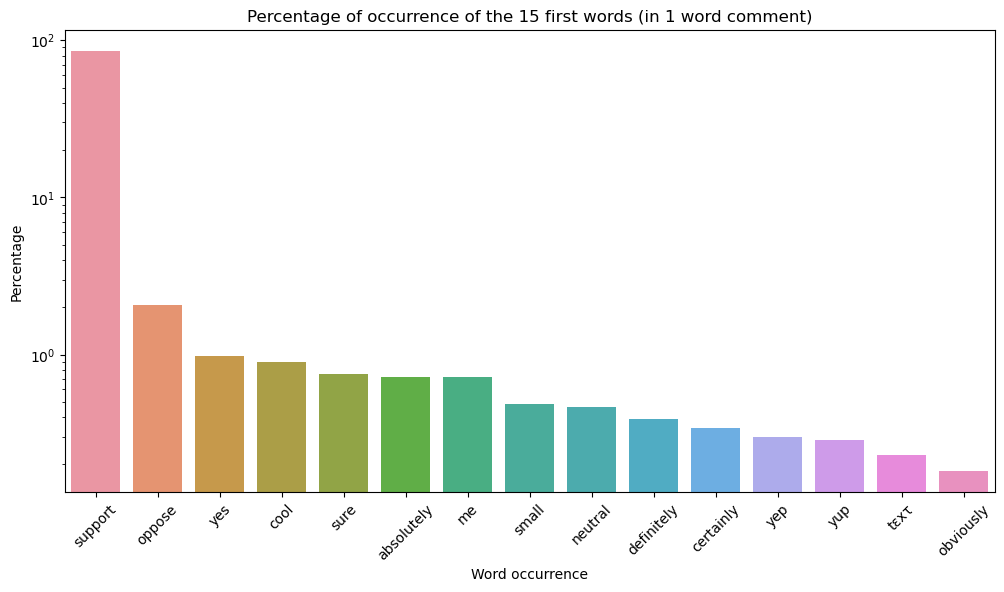

In [102]:
plt.figure(figsize=(12, 6))
sns.barplot(x=percentage[:15].index, y=percentage[:15].values)
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('Word occurrence')
plt.ylabel('Percentage')
plt.title('Percentage of occurrence of the 15 first words (in 1 word comment)')
plt.show()
                           

2 words comment analysis

In [27]:
two_words = stat_df[stat_df['Vector_Size']==2]
print('Proportion of comment of two words', len(two_words['Vector_Size'])/len(stat_df['Vector_Size'])*100)

Proportion of comment of two words 2.409784390366915


In [94]:
#Look at words individually
df_two_words = pd.DataFrame(np.concatenate(two_words['Vectorized_Comment'].values), columns=['word']) 
percentage_2words_ind=df_two_words['word'].value_counts(normalize=True)*100
print('Percentage of the 15 first words when looking at 2 word comment and considering each word independetly')
percentage_2words_ind[:15]

Percentage of the 15 first words when looking at 2 word comment and considering each word independetly


word
support       29.656760
strong         5.567183
yes            2.542905
per            2.427794
good           1.737129
absolutely     1.684805
course         1.601088
definitely     1.601088
of             1.590624
sure           1.580159
user           1.538301
tere           1.308079
oppose         1.297614
as             0.983675
darthvade      0.973211
Name: proportion, dtype: float64

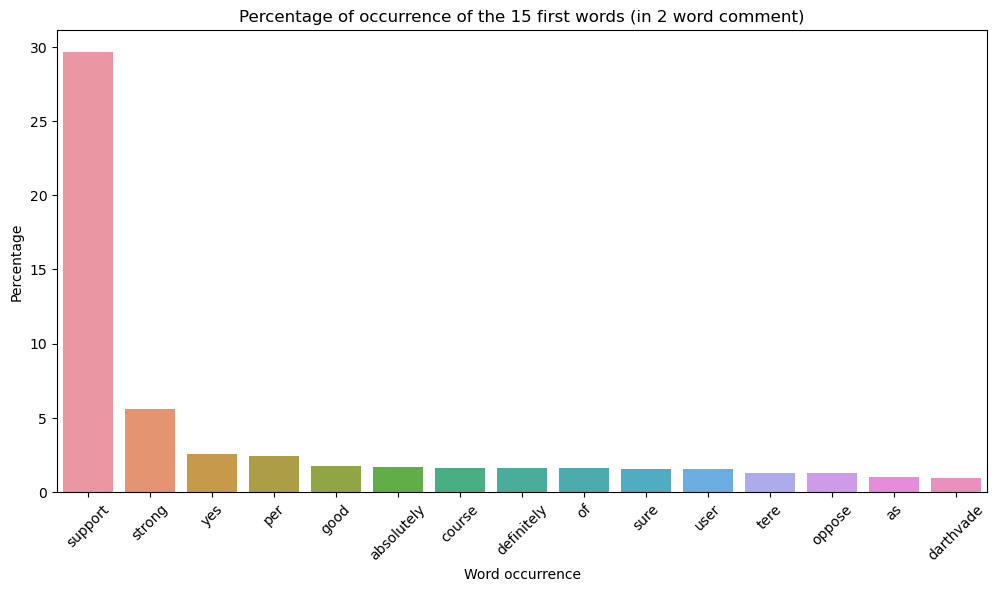

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x=percentage_2words_ind[:15].index, y=percentage_2words_ind[:15].values)
plt.xticks(rotation=45)
#plt.yscale('log')
plt.xlabel('Word occurrence')
plt.ylabel('Percentage')
plt.title('Percentage of occurrence of the 15 first words (in 2 word comment)')
plt.show()

In [95]:
#Look at pair of word
#order word to be able to compare them
df_paired_2words = pd.DataFrame(two_words['Vectorized_Comment'].values, columns=['word'])
df_paired_2words['word'] = df_paired_2words['word'].apply(lambda x: sorted(x))

paired_2words_percentage=df_paired_2words['word'].value_counts(normalize=True)*100
print('Percentage of the 15 first pair of words when looking at 2 word comment')
paired_2words_percentage[:15]


Percentage of the 15 first pair of words when looking at 2 word comment


word
[strong, support]        10.066974
[course, of]              3.181247
[absolutely, support]     3.076601
[support, yes]            2.909167
[definitely, support]     2.804521
[support, sure]           2.553370
[support, tere]           2.553370
[darthvade, support]      1.946421
[support, yep]            1.737129
[sub, wizardman]          1.444119
[small, support]          1.088321
[obviously, support]      1.067392
[hot, that]               0.920887
[strongly, support]       0.899958
[as, nom]                 0.837170
Name: proportion, dtype: float64

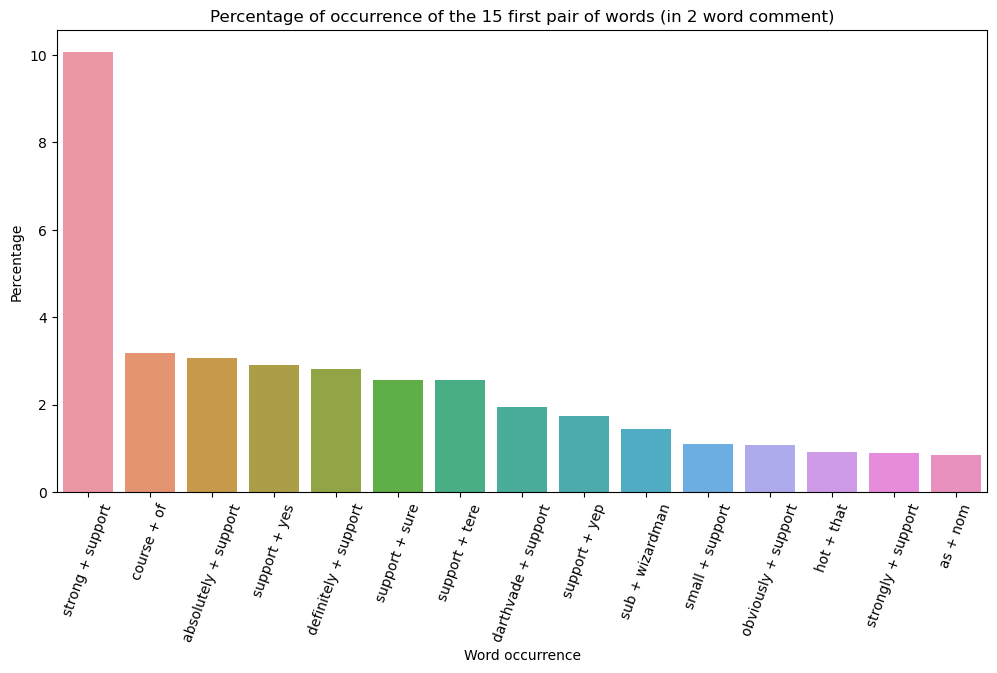

In [105]:
#values of x axis with the correct type for the plot
paired_strings = [' + '.join(pair) for pair in paired_2words_percentage.index]

plt.figure(figsize=(12, 6))
sns.barplot(x=paired_strings[:15], y=paired_2words_percentage[:15].values)
plt.xticks(rotation=70)
#plt.yscale('log')
plt.xlabel('Word occurrence')
plt.ylabel('Percentage')
plt.title('Percentage of occurrence of the 15 first pair of words (in 2 word comment)')
plt.show()

Most frequently used words

In [137]:
#Split the dataframe to avoid memory problem
list_of_dataframes = np.array_split(stat_df, 100)

#create word array for all small dataframe
word_array=[]
tot_nbr_words=0
for n in range(len(list_of_dataframes)):
    df=pd.DataFrame(np.concatenate(list_of_dataframes[n]['Vectorized_Comment'].values), columns=['word'])
    word_array.append(df)
    tot_nbr_words += len(df['word'])
    

In [148]:
#count the number of word for each occurence
def compute_sum_word(df):
    return df['word'].value_counts()
count = list(map(compute_sum_word, word_array))

In [178]:
#concatenate all word-occurrence for all array
all_words_df = pd.concat(count, axis=1).T
#compute the percentage of occurrence for all words present in the comment
percentage_word = all_words_df.sum(axis=0)/tot_nbr_words*100
#order for the plot
ordered_percentage_word= percentage_word.sort_values(ascending=False)

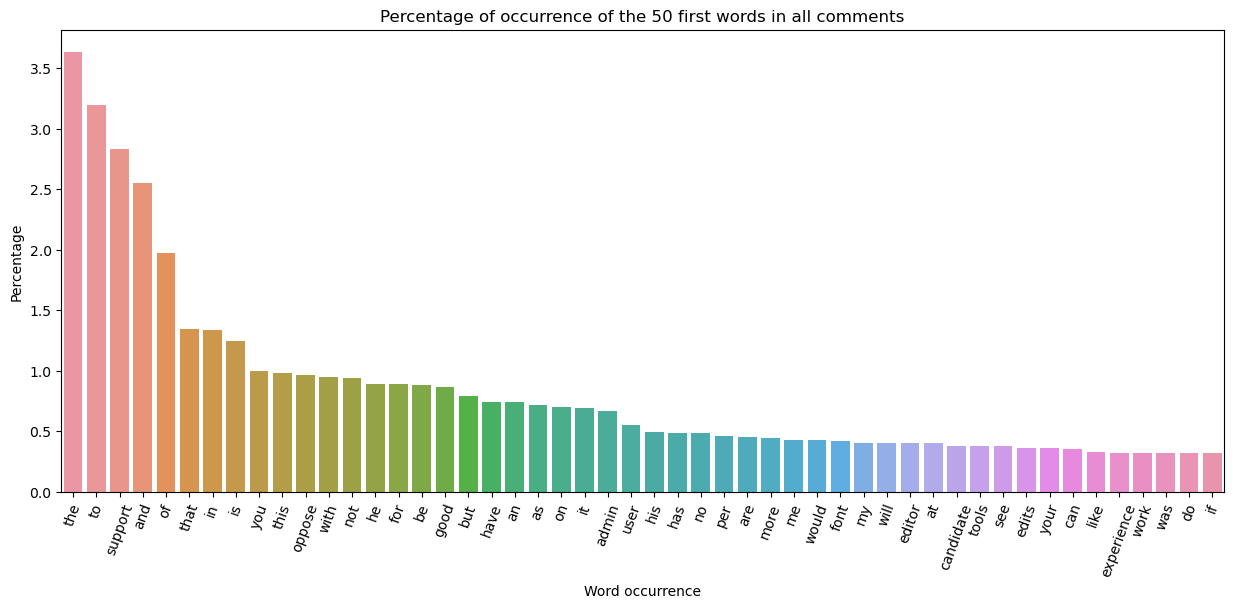

In [179]:
plt.figure(figsize=(15, 6))
sns.barplot(x=ordered_percentage_word[:50].index, y=ordered_percentage_word[:50].values)
plt.xticks(rotation=70)
plt.xlabel('Word occurrence')
plt.ylabel('Percentage')
plt.title('Percentage of occurrence of the 50 first words in all comments')
plt.show()

## Distribution plot

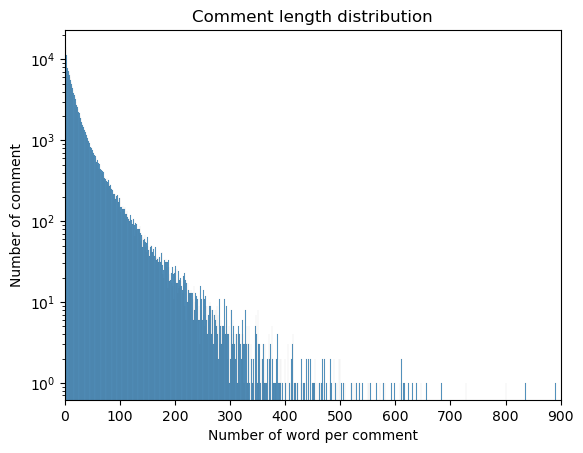

In [13]:
sns.histplot(stat_df['Vector_Size'],binwidth=1, kde=False)  
plt.title('Comment length distribution')
plt.xlabel('Number of word per comment')
plt.ylabel('Number of comment')
plt.xlim(0,900)
plt.yscale('log') #pas sûre si ok de mettre log scale ici
plt.show()

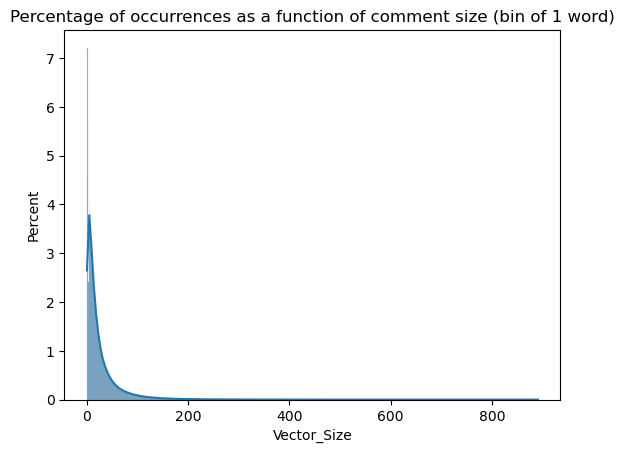

In [20]:
sns.histplot(data=stat_df, x='Vector_Size', kde=True, binwidth=1, stat='percent') 
plt.title('Percentage of occurrences as a function of comment size (bin of 1 word)')
plt.show()

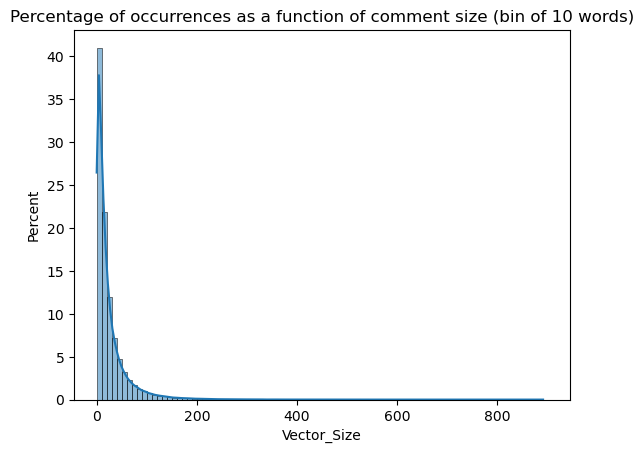

In [15]:
sns.histplot(data=stat_df, x='Vector_Size', kde=True, binwidth=10, stat='percent') #j'ai pris arbitrairement 10 mots
plt.title('Percentage of occurrences as a function of comment size (bin of 10 words)')
plt.show()

In [ ]:
"""EMMA VA REGARDER POUR AVOIR UN GRAPH QUI PERMETTE DE VOIR TOUTE LA DIST D'UN COUP """

#sns.histplot(data=stat_df, x='Vector_Size', kde=True, binwidth=1, stat='percent', log_scale=(True, False)) #j'ai pris 10 arbitrairement, à changer au besoin
fig, ax = plt.subplots(figsize=(15,10))
test = stat_df """ATTENTION, FAIRE UNE HARD COPY POUR PAS QUE CA MODIFIE LA DATAFRAME STAT_DF AUSSI"""
test.Vector_Size = test.Vector_Size+0.1
sns.histplot(data=test, kde=True, stat='percent', log_scale=(True, False), bins=100, ax=ax) #j'ai pris 10 arbitrairement, à changer au besoin
ax.set_title('Comment length distribution (percentage)')
ax.set_xlabel('Number of word per comment')
ax.set_ylabel('Percentage of comment')
ax.set_xscale('log')
ticks = [1, 10, 20, 50, 100, 200, 500, 1000]
#ax.set_xticks(ticks=ticks, labels=['1','10', '20', '50', '100', '200', '500', '1000'])
plt.show()